# QUACK Workshop: PCA in R
## Fall 2017
## Samy Abdel-Ghaffar & David Bourgin

In [4]:
# PLEASE RUN THIS NOW!! It will take a while and Sam will blab his mouth while this runs.
install.packages("ade4")
install.packages("fields")
library(ade4)
library(fields)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Motivation: Why PCA?

*From wikipedia:*

>Principal Components Analysis (more commonly known as PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Ok, that's great and all, but as with most wikipedia definitions of statistical procedures, I don't really understand what this concise definition is telling me until I understand what the statistical procedure in question does from a more intuitive perspective.

Perhaps a better way to understand PCA is to motivate the scenarios when one would want to use it, through examples. Once you see the powerful results of conducting PCA, it will hopefully be easier to understand exactly what it does, and how it does it. So let's begin...

## Reducing Dimensionality (Compression)

At it's core, PCA is a technique that reduces the dimensionality of data in a very useful way. This dimensionality reduction is what makes PCA useful in other ways that we'll see shortly, but sometimes dimensionality reduction is all that is desired.

Genmoics research deales with huge datasets, ~3 billion DNA base pairs in the human genome (although subsets are usually analyzed), where each base pair can be considered a dimension across humans. In order to make their analyses manegable, many geneticits employ PCA to reduce the dimensionality.

Another way to think about dimensionality reduction is that it compresses a data set, by finding a smaller number of dimensions that do a "good-enough" job of representing the original data. This type of compression is called lossy because some information is lost. A classic example of applied compression is .mp3 music files. The original music files are very large, and so to make downloading them manegeable (at least back in the dark ages of the early 2000s), the music was compressed into mp3 files. While mp3 files don't use PCA to do compression, the concept is the same.  

## Visualizing High-Dimensional Data

Visualization is a key part of conceptualizing and communicating data structure and analytic results. We are often confronted with high-dimensional data however, which poses a visualization challenge for our feeble 3-dimensional minds. Fortunately there are many techniques for reducing the dimensionality of data into 2 or 3 dimensions, which can then be easily visualized.

To illustrate this, let's take a simple example of 3D data that we'd like to visualize in 2 dimensions. Here is a scatter plot of some 3-dimensional data.

<img src="images2/PCA_Visualization1.png" align="left" style="height: 300px;"/>

Clearly this data lies on a plane at an angle. One way of visualizing this in 2D would be to just use 2 of the dimensions, which would look like this:

<img src="images2/PCA_Visualization2.png" align="left" style="height: 300px;"/>

But that throws away some information about the relative distances between the data points. A better solution is to use a dimensionality reduction technique like PCA (or Multi-Dimensional Scaline, aka MDS, which David will discuss later). This is what the 2D plot looks like using hte first 2 principial components (PCs) from a PCA.

<img src="images2/PCA_Visualization3.png" align="left" style="height: 300px;"/>

Much better! While we can't actually imagine high-dimensional data in a visual way, we can use the 3D to 2D data reduction case as an analogy for reducing data that is hundreds or thousands of dimension in size down to data that exists in 10s of dimensions.

## Finding Latent Variables

> In statistics, latent variables (as opposed to observable variables), are variables that are not directly observed but are rather inferred (through a mathematical model) from other variables that are observed (directly measured).

By finding a subset of interesting dimensions, PCA finds latent variables that capture much of the variance in the original data. 

In this example, many variables concerning emotional, cognitive and behavioral factors are all affected by a latent variable, namely depression. Once could imagine administering a questionnaire that asks many of these sorts of questions, and using PCA to identify latent variables such as depression and anxiety.

<img src="images2/LatentVariable_Depression.jpg" align="left" style="height: 300px;"/>

## Denoising Data

PCA can be used for removing noise from a data. The idea is that by dropping the least interesting principal components from your data you are removing variance that is mostly noise, and so you increase the SNR of your data. Below is an example of using PCA to denoise the classic USPS digit images. The top row contains the original images, the middle shows those images with white Guassian noise added to them, and the bottom row shows the images reconstructed with the bottom PCs missing. Clearly the bottom row is less noisy than the middle row! 

<img src="images2/PCA_Denoising_Numbers.png" align="left" style="height: 300px;"/>

This same principal is the basis for another statistical technique called *Principal Components Regression*, which simply applies PCA to the independent variables before running a linear regression. By removing noise through the application of PCA, this technique aims to reduce over-fitting to the data. More info can be found here: https://en.wikipedia.org/wiki/Principal_component_regression

# PCA Basics

Now that we have some idea of what PCA can do, let's cover some background concepts and assumptions of PCA before diving into the algorithm and code.

## Linear Algebra Background Concepts

### Vector (Linear) Spaces and Linear Subspaces

TODO

### Projections & Rotations

TODO

<img src="images2/2D_to_1D_Projection.jpg" align="left" style="height: 200px;"/>

<img src="images2/3D_to_2D_Projection.png" align="left" style="height: 200px;"/>

<img src="images2/RotationMatrixAxes.gif" align="left" style="height: 200px;"/>

### Basis Functions (Vectors)

TODO

### Manifolds

TODO

<img src="images2/SwissRoll.png" align="left"/>

source: http://222.252.30.203:8888/bitstream/123456789/11256/1/intelligent%20systems%20and%20their%20applications.Vol.25.Iss.4.A.6.pdf

<img src="images2/SwissRoll_DimReducTechniques.png" align="left"/>

## Assumptions

When using any statistical procedure it is always important to know and respect the assumptions underlying the technique. Let's look at the assumptions behind PCA now.

For a wonderful tutorial on PCA, and the source of these assumptions see: https://arxiv.org/pdf/1404.1100.pdf

### Linearity

Linearity frames the problem as a change of basis. Several areas of research have explored how extending these notions to nonlinear regimes. In other words, we assume that the data we have are created from a weighted linear combination of some other variables.  

### Large variances have important structure.

This assumption also encompasses the belief that the data has a high signal-to-noise-ratio (SNR). Hence, principal components with larger associated variances represent interesting structure, while those with lower variances represent noise. Note that this is a strong, and sometimes, incorrect assumption.

### Orthogonal Dimensions

This assumption provides an intuitive simplification that makes PCA soluble with linear algebra decomposition techniques.

## Limitations

As with all statistical techniques, PCA has it's limitations. The primary limitation is that is can only find relationships that are pairwise linear correlations between the variables. In other words, PCA cannot find higher order relationships between data, such as polynomial, explonential or logarithmic relationships (as we saw in the Swiss Roll manifold example above). Because multivariate Gaussian distributions can be fully explained using the mean (which is removed in PCA) and the covariance, PCA has an implicit assumption that the data you are using in your PCA is multivariate Gaussian.

Here's a more in-depth explanation of why, for those interested:
https://www.quora.com/Are-there-implicit-Gaussian-assumptions-in-the-use-of-PCA-principal-components-analysis

# PCA: A More Formal Definition

Now that we've given somewhat of an intuition as to what PCA can be used for, and have some basic linear algebra concepts necessary, let's take a more formal look at what PCA does. As with most (if not all!) statistical techniques, PCA can be thought of from a geometric perspective as well as an algebraic perspective. First we'll touch on the geometric perspective, then get into the algebraic perspective.

## Geometric Perspective: Projection Onto Lower Dimensional Manifold

Perhaps the simplest way to think about PCA is that it finds a useful manifold (and the linear subspace that contains that manifold) of the vector space where the data lives. The subspace it finds is comprised of the top N principal components (PCs). The data is then projected onto that lower dimensional subspace. Below is an example showing data in a 3D space, that is projected into a 2D subspace.

<img src="images2/pca_manifold.png" align="left" style="height: 400px;"/>

# Matrix Decomposition

TODO

To find 

<img src="images2/rank_one.png" align="left" style="height: 300px;"/>
<img src="images2/pca_3.png" align="left" style="height: 300px;"/>

## Cost Function

TODO

<img src="images2/pca_two_views.png" align="left" style="height: 300px;"/>

<img src="images2/PCA_Error.gif" align="left" style="height: 300px;"/>

## Algorithms

### Eigenvalue Decomposition of Covariance Matrix

The first algorithm to conduct PCA consists of several steps built around an eigenvalue decomposition of the covariance matrix of the dataset. Eigenvalue decomposition, and why this algorithm works to minimize the cost function, are beyond the scope of today's workshop. If you'd like to dig into this topic further, see this excellent chapter on linear algebra, that explains both: http://www.deeplearningbook.org/contents/linear_algebra.html 

### Steps for conducting PCA
1. Demean (and scale when appropriate) data
2. Create the covariance matrix
3. Conduct eigenvalue decomposition of covariance matrix
4. Normalize the eignevectors to unit length
5. Create scores 
6. Reconstruct the original data (optional sanity check)

Let's use a simple dataset containing the data from the 1988 men's olympic decathalon to practice doing PCA.

In [70]:
# load the olympic decathalon dataset and have a look at it
data(olympic)
str(olympic$tab)

'data.frame':	33 obs. of  10 variables:
 $ 100 : num  11.2 10.9 11.2 10.6 11 ...
 $ long: num  7.43 7.45 7.44 7.38 7.43 7.72 7.05 6.95 7.12 7.28 ...
 $ poid: num  15.5 15 14.2 15 12.9 ...
 $ haut: num  2.27 1.97 1.97 2.03 1.97 2.12 2.06 2 2.03 1.97 ...
 $ 400 : num  48.9 47.7 48.3 49.1 47.4 ...
 $ 110 : num  15.1 14.5 14.8 14.7 14.4 ...
 $ disq: num  49.3 44.4 43.7 44.8 41.2 ...
 $ perc: num  4.7 5.1 5.2 4.9 5.2 4.9 5.7 4.8 4.9 5.2 ...
 $ jave: num  61.3 61.8 64.2 64 57.5 ...
 $ 1500: num  269 273 263 285 257 ...


#### Step 1: Demean the Data

In [71]:
# demean the data
olympicMat = as.matrix(olympic$tab)
olympicDemean = scale(olympicMat, center=TRUE, scale=FALSE)

#### Step 2: Create the covariance matrix

In [125]:
plotCovMat <- function(data) {
    redBlueColors = colorRampPalette(c('blue', 'white', 'red'), space='Lab')(100)
    data_R <- apply(data, 2, rev)
    image.plot(t(data_R), zlim=c(min(data),max(data)), axes=FALSE, col = redBlueColors)
    image(t(data_R), zlim=c(min(data),max(data)), axes=FALSE, col = redBlueColors, add=TRUE)
    axis(3, at=seq(0,1, length=ncol(data)), labels=colnames(data), lwd=0, pos=1.025)
    axis(2, at=seq(1,0, length=ncol(data)), labels=colnames(data), lwd=0, pos=-0.025)
    }

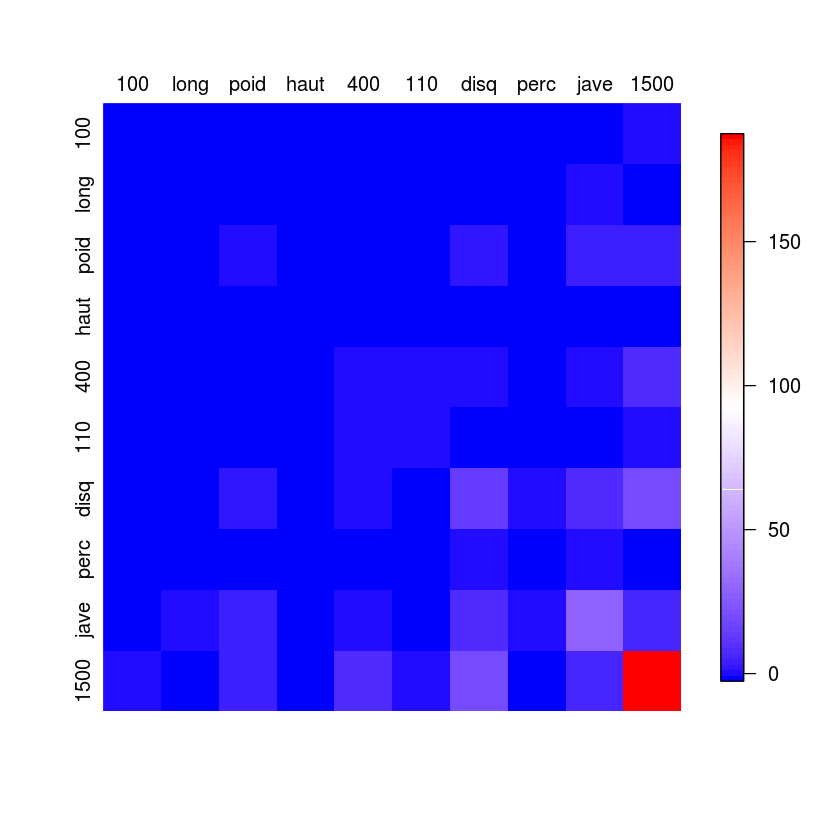

In [156]:
# Plot size
options(repr.plot.width = 7, repr.plot.height = 7)

# create the covariance matrix
olympicDemeanCov = cov(olympicDemean)
#options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 300)
plotCovMat(olympicDemeanCov)

#### Step 3: Conduct eigenvalue decomposition of covariance matrix

List of 2
 $ values : num [1:10] 189.908 33.69 8.766 0.885 0.487 ...
 $ vectors: num [1:10, 1:10] 0.004504 -0.008496 0.029493 -0.000715 0.045589 ...


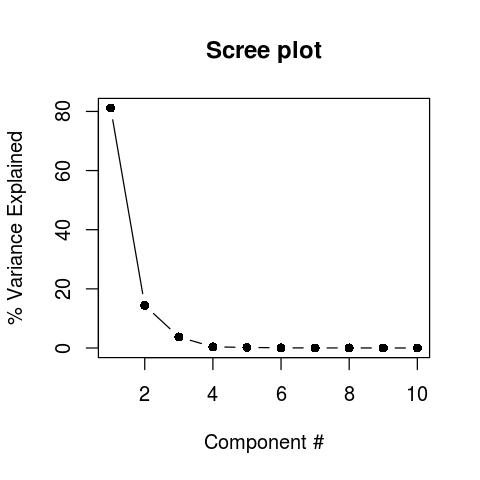

In [154]:
# Plot size
options(repr.plot.width = 4, repr.plot.height = 4)

# do the eigenvalue decomposition
olympicEig = eigen(olympicDemeanCov)
str(olympicEig)

# calculate the variance explained per PC
olympicPCVarEx = (olympicEig$values / sum(olympicEig$values)) * 100.0
plot(olympicPCVarEx, type='b', xlab='Component #', ylab='% Variance Explained', main="Scree plot", col = 'black', pch=16)

#### Step 4: Normalize the eignevectors to unit length

In [10]:
# Normalize PCs to unit length
olympicPCALoadings = olympicEig$vectors / norm(olympicEig$vectors, type="2")

# TODO
# visualize the loadings

#### Step 5: Create scores 

In [11]:
# create scores
olympicPCAScores = olympicDemean %*% olympicPCALoadings

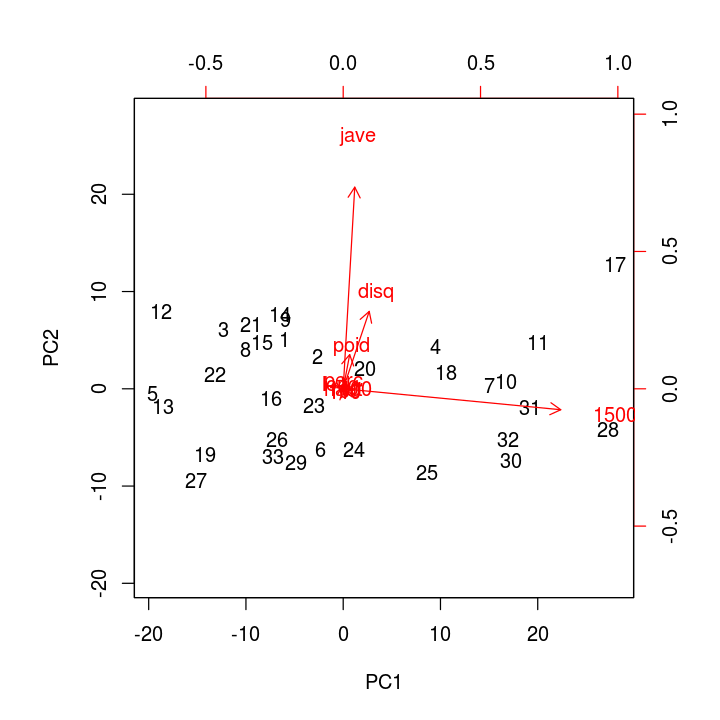

In [153]:
# Plot size
options(repr.plot.width = 6, repr.plot.height = 6)

# set the original variables names to be the row names of PCA Loadings
rownames(olympicPCALoadings) = colnames(olympicMat)

# make a bilplot showing the scores and loadings for the first 2 PCs
biplot(olympicPCAScores[,1:2], olympicPCALoadings[,1:2], xlab='PC1', ylab='PC2')

#### Using the R PCA function

We went through the steps of PCA to give you an idea of what's involved. Of course R has several functions that do PCA for you in one simple function call. Let's look at this now

In [13]:
# Use the built-in R function that does PCA using eigenvalue decomposition of the covariance matrix
olympicPCAEig = princomp(olympic$tab)

[1] TRUE

[1] TRUE

Let's check whether the scores and loadings that we calculated are the same as those the R function calculated.

In [74]:
# Use abs() because some of the PCs are flipped, which doesn't matter except that the scores will be flipped too 
all.equal(abs(olympicPCAScores), abs(olympicPCAEig$scores), check.attributes = FALSE, check.names=FALSE)
all.equal(abs(olympicPCALoadings), abs(as.matrix(olympicPCAEig$loadings[,])), check.attributes = FALSE, check.names=FALSE)

[1] TRUE

[1] TRUE

#### Step 6: Reconstruct the original data

In [75]:
# reconstruct the data
reconstructedData = t(t(olympicPCAScores %*% t(olympicPCALoadings)) + colMeans(olympicMat))

Let's verify this reconstructed data is the same as the original data

In [76]:
all.equal(reconstructedData, olympicMat, , check.attributes = FALSE, check.names=FALSE)

[1] TRUE

## Correlation vs. Covariance

TODO

In [15]:
# now let's scale the the data instead of just demeaning it
olympicScale = scale(olympicMat, center=TRUE, scale=TRUE)

In [16]:
# and get the covariance matrix for the scaled data
olympicScaleCov = cov(olympicScale) 

[1] TRUE

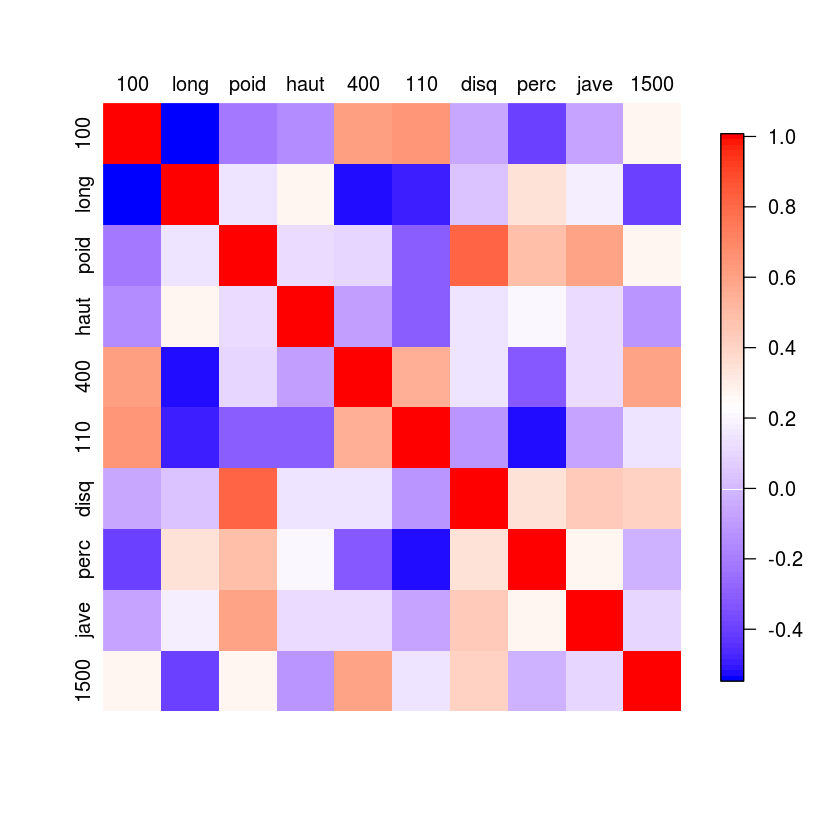

In [157]:
# Plot size
options(repr.plot.width = 7, repr.plot.height = 7)

# get the correlation matrix of the original data
olympicCorr = cor(olympicMat)
all.equal(olympicScaleCov, olympicCorr, , check.attributes = FALSE, check.names=FALSE)

# TODO - try to use the blue red color scheme from corrplot 
# TODO - put feature labels on the plot
# TODO - figure out why this plot is rotated 90 degrees (the diagonal should go top-left to bottom-right)
plotCovMat(olympicCorr)

corrplot 0.84 loaded


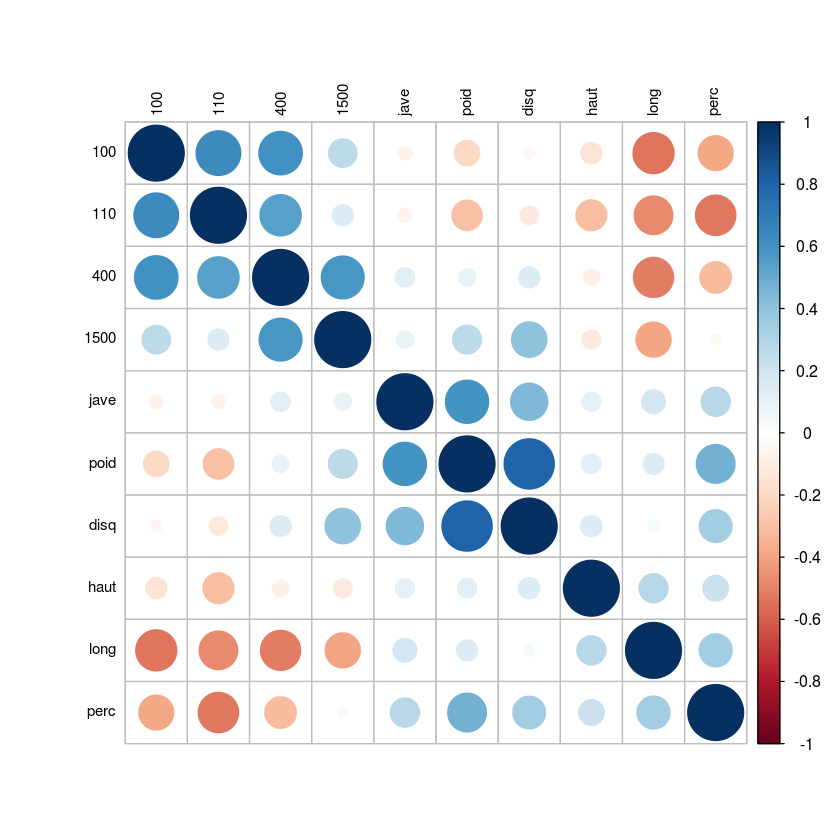

In [18]:
library(corrplot)
?corrplot
# TODO - flip the color scale so Red is positive and blue is negative.
corrplot(olympicCorr, order = "hclust", tl.col='black', tl.cex=.75)

List of 2
 $ values : num [1:10] 3.418 2.606 0.943 0.878 0.557 ...
 $ vectors: num [1:10, 1:10] 0.416 -0.394 -0.269 -0.212 0.356 ...


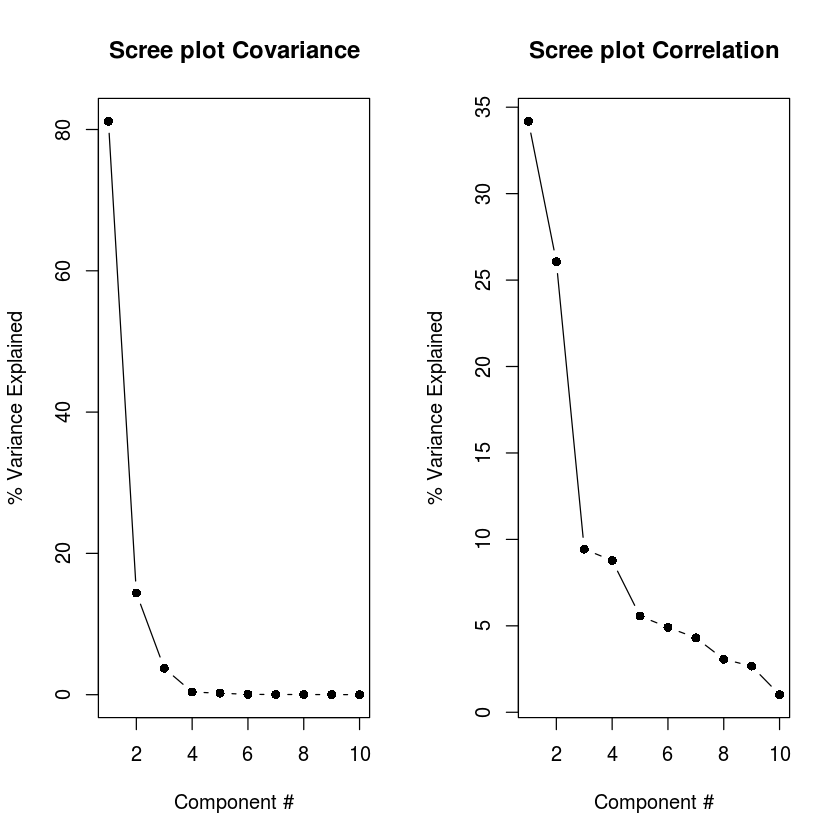

In [137]:
# now let's redo the eigenvalue decomposition and recreate the scores using the correlation matrix instead
olympicCorrEig = eigen(olympicCorr)
str(olympicCorrEig)

# calculate the variance explained by dividing each eigenvalue by the sum of all the eigenvalues
olympicCorrPCVarEx = (olympicCorrEig$values / sum(olympicCorrEig$values)) * 100.0

# make the scree plot
par(mfrow=c(1,2))
plot(olympicPCVarEx, type='b', xlab='Component #', ylab='% Variance Explained', main="Scree plot Covariance", pch=16)
plot(olympicCorrPCVarEx, type='b', xlab='Component #', ylab='% Variance Explained', main="Scree plot Correlation", pch=16)

In [20]:
# calculate the loadings by scaling the eigenvectors to unit lenght (i.e. 1)
olympicCorrPCALoadings = olympicCorrEig$vectors / norm(olympicCorrEig$vectors, type="2")

# TODO
# visualize the loadings

In [21]:
# create the scores by multiplying the scaled data with the loadings 
olympicCorrPCAScores = olympicScale %*% olympicCorrPCALoadings

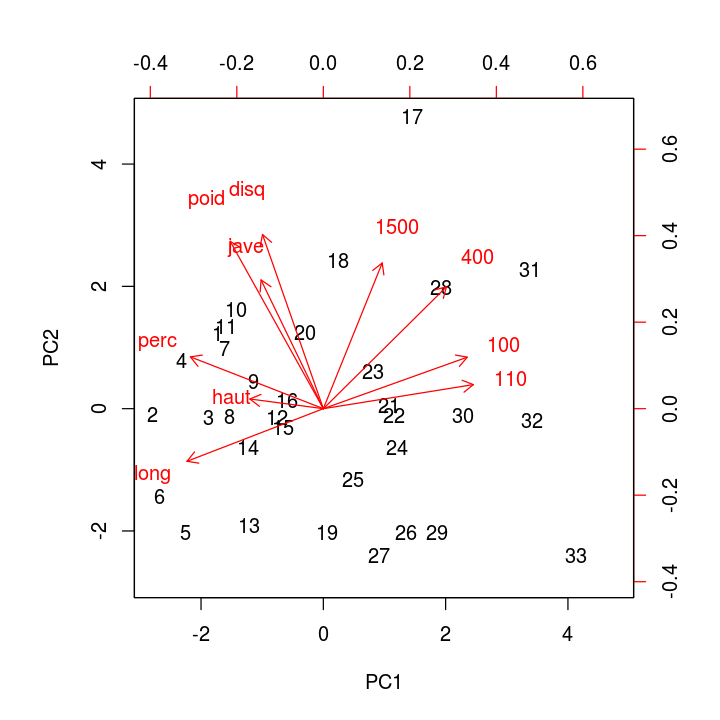

In [152]:
# Plot size
options(repr.plot.width = 6, repr.plot.height = 6)

rownames(olympicCorrPCALoadings) = colnames(olympicMat)

# make a bilplot showing the scores and loadings for the first 2 PCs
biplot(olympicCorrPCAScores[,1:2], olympicCorrPCALoadings[,1:2], xlab='PC1', ylab='PC2')

### Least squares vs. PCA

We have learned that PCA is minimizing the squared error between the principal components (each a line) and the data. You have likely learned about another technique that minimzes the squared error of data, namely simple regression using ordinary least squares (OLS). PCA and OLS are somewhat similar techniques, although they differ in important ways. 

The first thing to note is that PCA is an unsupervised technique, meaning there is no data we are trying to predict (i.e. no dependent variable, or y). While OLS is a supervised technique that is trying to use a dataset (the independent variable(s), or x) to predict a second dataset (the dependent variable, or y). 

Perhaps the easiest way to see how they differ is to visualize the solutions, and the values they are miniming. Let's do that now by doing PCA and OLS on two of the variables from our olympic decathalon dataset.

In [68]:
# a couple helper functions to do projections onto a line.
# source: https://stackoverflow.com/questions/8457279/visual-comparison-of-regression-pca
pointOnLineNearPoint <- function(Px, Py, slope, intercept) {
    # Px, Py is the point to test, can be a vector.
    # slope, intercept is the line to check distance.
    Ax <- Px-10*diff(range(Px))
    Bx <- Px+10*diff(range(Px))
    Ay <- Ax * slope + intercept
    By <- Bx * slope + intercept
    pointOnLine(Px, Py, Ax, Ay, Bx, By)
    }

pointOnLine <- function(Px, Py, Ax, Ay, Bx, By) {
    # This approach based upon comingstorm's answer on
    # stackoverflow.com/questions/3120357/get-closest-point-to-a-line
    # Vectorized by Bryan
    PB <- data.frame(x = Px - Bx, y = Py - By)
    AB <- data.frame(x = Ax - Bx, y = Ay - By)
    PB <- as.matrix(PB)
    AB <- as.matrix(AB)
    k_raw <- k <- c()
    for (n in 1:nrow(PB)) {
        k_raw[n] <- (PB[n,] %*% AB[n,])/(AB[n,] %*% AB[n,])
        if (k_raw[n] < 0)  { k[n] <- 0
            } else { if (k_raw[n] > 1) k[n] <- 1
                else k[n] <- k_raw[n] }
        }
    x = (k * Ax + (1 - k)* Bx)
    y = (k * Ay + (1 - k)* By)
    ans <- data.frame(x, y)
    ans
    }

In [53]:
# subset the olympic dataset to get the times for the athletes in the 400m and 1500m races
olympicSub = olympicMat[,c("400","1500")]
olympicSub_Z = scale(olympicSub)

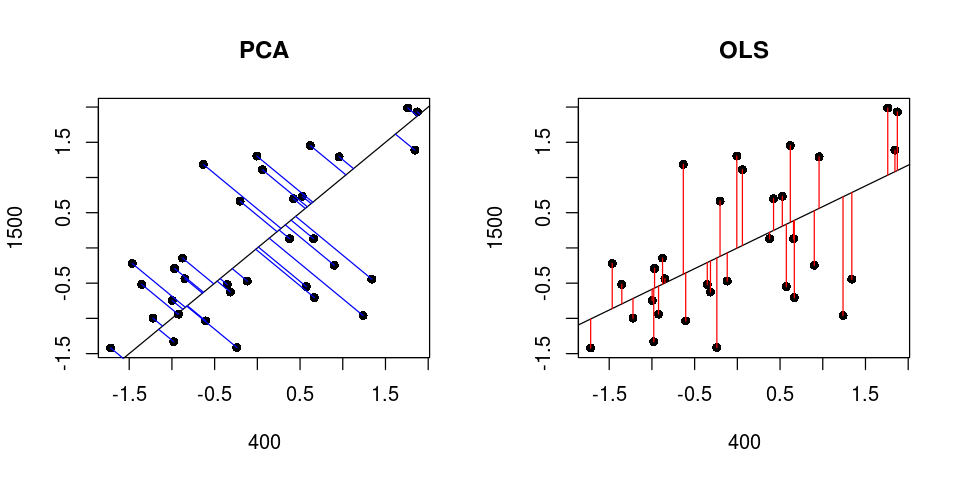

In [150]:
# Plot size
options(repr.plot.width = 8, repr.plot.height = 4)

####################### PCA #######################

# calculate PCA on these two 
olympicSubPCA = prcomp(olympicSub_Z)

# calculate the slope of the first PC, and we know the intercept is 0 because PCA is centered
slopePC1 = olympicSubPCA$rotation[2,1] / olympicSubPCA$rotation[1,1]
interceptPC1 = 0

# plot the original data
par(mfrow=c(1,2))
#layout(matrix(c(1,2), 1, 2, byrow = TRUE), widths=c(1,1), heights=c(.5,.5))
plot(scale(olympicSub), pch=16, main="PCA")

# plot the PC as a line
abline(interceptPC1, slopePC1)

# calculate the projections of the data onto the first PC, and plot those lines
projectionsPCA <- pointOnLineNearPoint(olympicSub_Z[,1], olympicSub_Z[,2], slopePC1, interceptPC1)
segments( olympicSub_Z[,1], olympicSub_Z[,2], projectionsPCA[,1], projectionsPCA[,2], col = "blue")

####################### OLS #######################
# calculate OLS on these two 
olympicSubOLS = lm(olympicSub_Z[,2]~olympicSub_Z[,1])

# plot the original data
plot(olympicSub_Z, pch=16, main="OLS")

# plot the regression line
abline(olympicSubOLS$coefficients[1], olympicSubOLS$coefficients[2])

# plot the residual lines
segments(olympicSub_Z[,1], olympicSub_Z[,2], olympicSub_Z[,1], fitted(olympicSubOLS), col = "red")

### SVD (Maximizing Projection Variance)

TODO

Latent Semantic Analysis (LSA) relies on SVD, as an example.

Explain the difference between SVD and Eig

If you don't have a square matrix, then SVD can be used

In [ ]:
olympicPCASVD = prcomp(olympic$tab)
all.equal(abs(olympicPCASVD$x), abs(olympicPCA$scores), check.attributes = FALSE, check.names=FALSE)

## Example: Eigenfaces